In [49]:
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork as NW

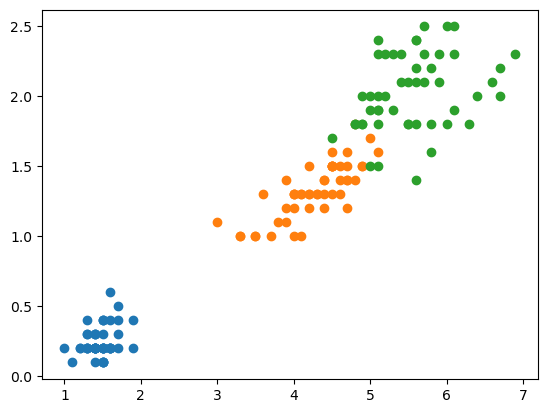

In [50]:
# Load data

iris_dtype = np.dtype([('vals', float, (4,)), 
                       ('art', np.str_, 16)])
vals, labels = np.loadtxt('../iris/iris.data', dtype=iris_dtype, delimiter=',', unpack=True)

iris = vals.T

iris.shape, labels

for lab in np.unique(labels):
    plt.plot(*iris[2:4, labels == lab], 'o')

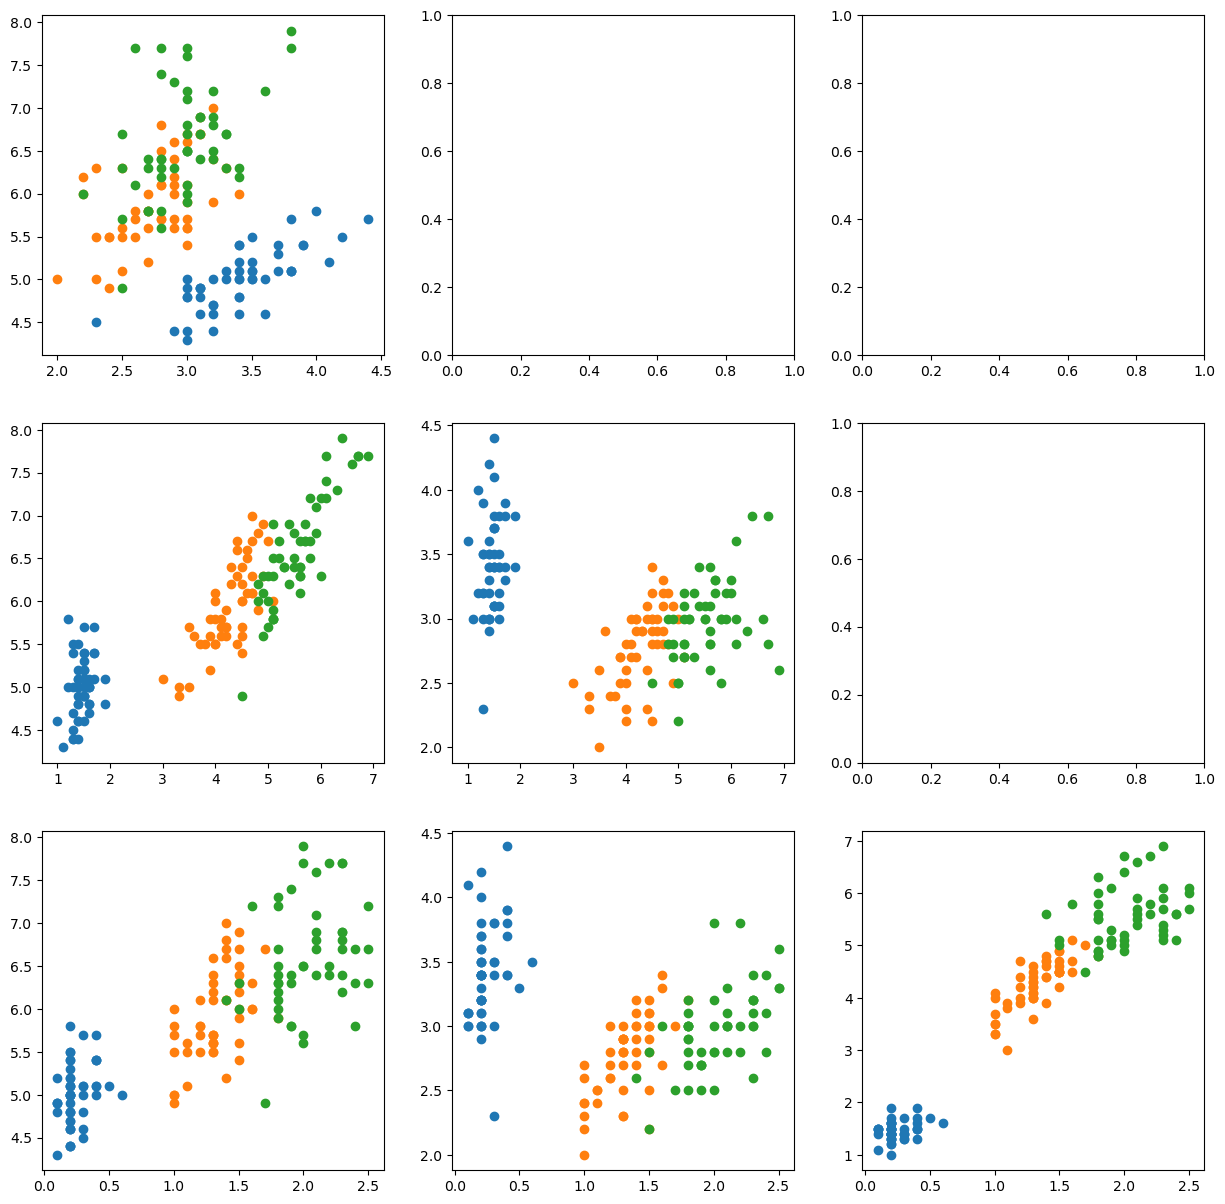

In [51]:
# Plot of different variables against eachother
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i in range(4):
    for j in range(4):
        if i <= j:
            continue

        plotMat = np.vstack([iris[i], iris[j]])
        for lab in np.unique(labels):
            ax[i-1, j].plot(*plotMat[:, labels == lab], 'o')

# Training network with Iris data

In [52]:
layerIris = [
            {
                    "layerType" : 'input',          # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
                    "inputShape": (300, 300)
            }, 
            {
                    "layerSize" : 12,              # parameter for deciding the amount of nodes in the layer
                    "layerType" : 'convolutional', # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
                    "filterSize": 3
            }, 
            {
                    "layerSize" : 3,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 'pooling',       # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
                    "downScale" : 3
            }, 
            {
                    "layerSize" : 3,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 'perceptron',       # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
            }, 
        ]

IrisNetwork = NW.NeuralNetwork(layerIris)

(3, 29403) (29403, 1)


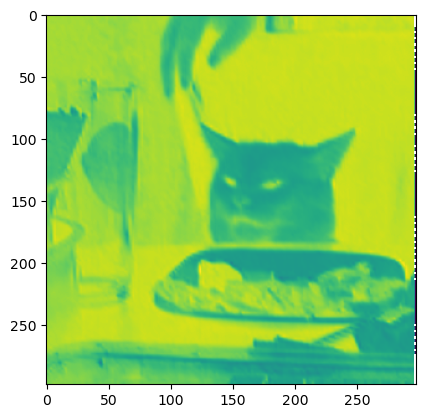

In [53]:
# set test input
image = plt.imread('testImg.png')
imageRed = image[:, :, 0]
IrisNetwork.setInput(input=imageRed)

# Run network
IrisNetwork.runNetwork()

plt.imshow(IrisNetwork.layers[1].output[0])

In [54]:
iris.shape, labels.shape

((4, 150), (150,))

In [55]:
labels[0:149:50]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U16')

## Opdeling af data i et testsæt og et træningssæt

Træningssættet kommer til at indeholde 30 elementer, og testsættet kommer til at indeholde 20 elementer.

In [56]:
irisTrain = np.hstack([iris[:, 0:30], iris[:, 50:80], iris[:, 100:130]])
labelsTrain = np.hstack([labels[0:30], labels[50:80], labels[100:130]])

irisTest = np.hstack([iris[:, 30:50], iris[:, 80:100], iris[:, 130:150]])
labelsTest = np.hstack([labels[30:50], labels[80:100], labels[130:150]])

irisTrain.shape, labelsTrain.shape, irisTest.shape, labelsTest.shape, labelsTrain

((4, 90),
 (90,),
 (4, 60),
 (60,),
 array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicol

In [57]:
# Convert labels to expected outputs

expectedTrainingOutputs = np.array([])
for label in labelsTrain:
    expectedOutput = np.ndarray(0)
    if label == 'Iris-setosa':
        expectedOutput = np.array([1., 0., 0.]) [:, np.newaxis]
    elif label == 'Iris-versicolor':
        expectedOutput = np.array([0., 1., 0.]) [:, np.newaxis]
    else:
        expectedOutput = np.array([0., 0., 1.]) [:, np.newaxis]

    if expectedTrainingOutputs.size == 0:
        expectedTrainingOutputs = expectedOutput
    else:
        expectedTrainingOutputs = np.hstack([expectedTrainingOutputs, expectedOutput])

expectedTrainingOutputs[:, 0:90:6]


array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [58]:
# Convert labels to expected outputs

expectedTestOutputs = np.array([])
for label in labelsTest:
    expectedOutput = np.ndarray(0)
    if label == 'Iris-setosa':
        expectedOutput = np.array([1., 0., 0.]) [:, np.newaxis]
    elif label == 'Iris-versicolor':
        expectedOutput = np.array([0., 1., 0.]) [:, np.newaxis]
    else:
        expectedOutput = np.array([0., 0., 1.]) [:, np.newaxis]

    if expectedTestOutputs.size == 0:
        expectedTestOutputs = expectedOutput
    else:
        expectedTestOutputs = np.hstack([expectedTestOutputs, expectedOutput])

expectedTestOutputs[:, 0:60:6]


array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [59]:
for i in range(300):
    IrisNetwork.trainNetworkGradDec(trainingInput=irisTrain, expectedOutputMatrix=expectedTrainingOutputs)
    print("Iteration: ", i)
    
    # Check correctness
    counter : int = 0
    for test in range(len(irisTest[0])):
        IrisNetwork.setInput(input=irisTest[:, test])
        IrisNetwork.runNetwork()
        #print(np.argmax(IrisNetwork.getOutput() [:, np.newaxis]), np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]))
        if np.argmax(IrisNetwork.getOutput() [:, np.newaxis]) == np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]):
            counter += 1

    print(counter / len(irisTest[0]))

AttributeError: 'PerceptronLayer' object has no attribute 'nodes'

In [ ]:
IrisNetwork.setInput(input=irisTest[:, 15])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 15] [:, np.newaxis]

(array([[0.87241655],
        [0.17339443],
        [0.02388388]]),
 array([[1.],
        [0.],
        [0.]]))

In [ ]:
IrisNetwork.setInput(input=irisTest[:, 25])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 25] [:, np.newaxis]

(array([[0.11459347],
        [0.49753934],
        [0.3441139 ]]),
 array([[0.],
        [1.],
        [0.]]))

In [ ]:
IrisNetwork.setInput(input=irisTest[:, 26])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 26] [:, np.newaxis]

(array([[0.09893283],
        [0.5139286 ],
        [0.36894414]]),
 array([[0.],
        [1.],
        [0.]]))

In [ ]:
IrisNetwork.setInput(input=irisTest[:, 23])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 23] [:, np.newaxis]

(array([[0.05048271],
        [0.41251952],
        [0.60859678]]),
 array([[0.],
        [1.],
        [0.]]))

In [ ]:
IrisNetwork.setInput(input=irisTest[:, 5])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 5] [:, np.newaxis]

(array([[0.89754677],
        [0.15790254],
        [0.0199865 ]]),
 array([[1.],
        [0.],
        [0.]]))

In [ ]:
IrisNetwork.setInput(input=irisTest[:, 50])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 50] [:, np.newaxis]

(array([[0.04370582],
        [0.40437938],
        [0.64303489]]),
 array([[0.],
        [0.],
        [1.]]))

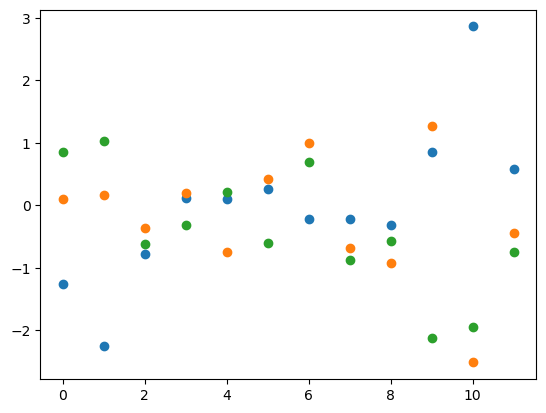

In [ ]:
for node in IrisNetwork.layers[2].nodes:
    plt.plot(node.weights, 'o')

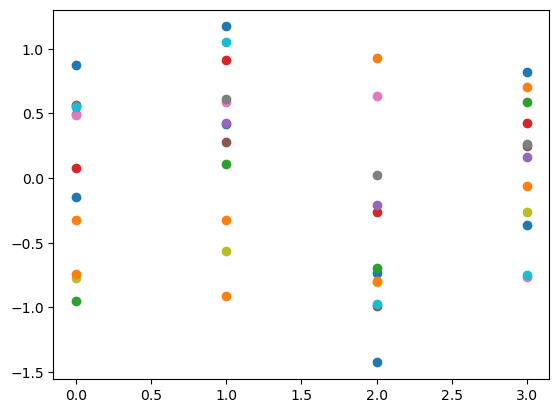

In [ ]:
for node in IrisNetwork.layers[1].nodes:
    plt.plot(node.weights, 'o')

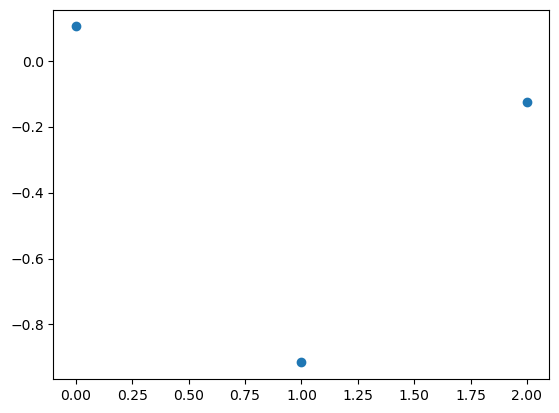

In [ ]:
plt.plot([node.bias for node in IrisNetwork.layers[2].nodes], 'o')

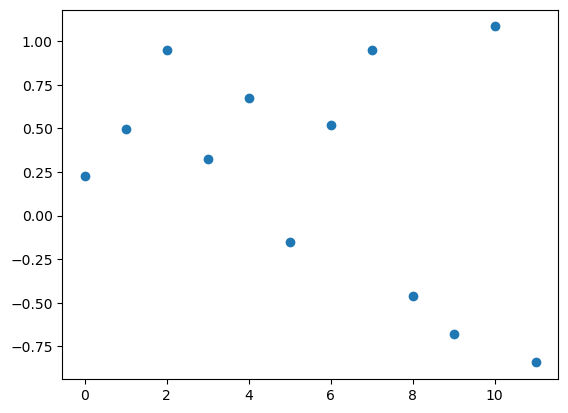

In [ ]:
plt.plot([node.bias for node in IrisNetwork.layers[1].nodes], 'o')

In [ ]:
IrisNetwork.layers[0].nodes[0].activation

6.7

In [ ]:
counter : int = 0
for test in range(len(irisTest[0])):
    IrisNetwork.setInput(input=irisTest[:, test])
    IrisNetwork.runNetwork()
    #print(np.argmax(IrisNetwork.getOutput() [:, np.newaxis]), np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]))
    if np.argmax(IrisNetwork.getOutput() [:, np.newaxis]) == np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]):
        counter += 1

print(counter / len(irisTest[0]))
    

0.9333333333333333
